### Desenvolvimento e Entrega do 3º Checkpoint - Data Science e Statistical
 
**Nomes + RM dos integrantes:**
- Guilherme Akio - 98582
- Fabrício Saavedra - 97631
 
**Turma:** 2ESPW
 
**Ano:** 2024

> Link do repositório: https://github.com/Fabr1c100/GS_2SEM_DataScience.git

___ 
### Descrição do Projeto
.

> Base: https://www.kaggle.com/datasets/jainaru/global-ecological-footprint-2023/data


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [40]:
df = pd.read_csv('Global Ecological Footprint 2023.csv', encoding='latin-1')

print(df.columns)

Index(['Country', 'Region', 'SDGi', 'Life Exectancy', 'HDI', 'Per Capita GDP',
       'Income Group', 'Population (millions)', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Product Footprint', 'Carbon Footprint',
       'Fish Footprint', 'Built up land',
       'Total Ecological Footprint (Consumption)', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Built up land.1',
       'Total biocapacity ', 'Ecological (Deficit) or Reserve',
       'Number of Earths required', 'Number of Countries required'],
      dtype='object')


#### 1. Qual é a relação entre a Expectativa de Vida e o Índice de Desenvolvimento Humano (HDI)?

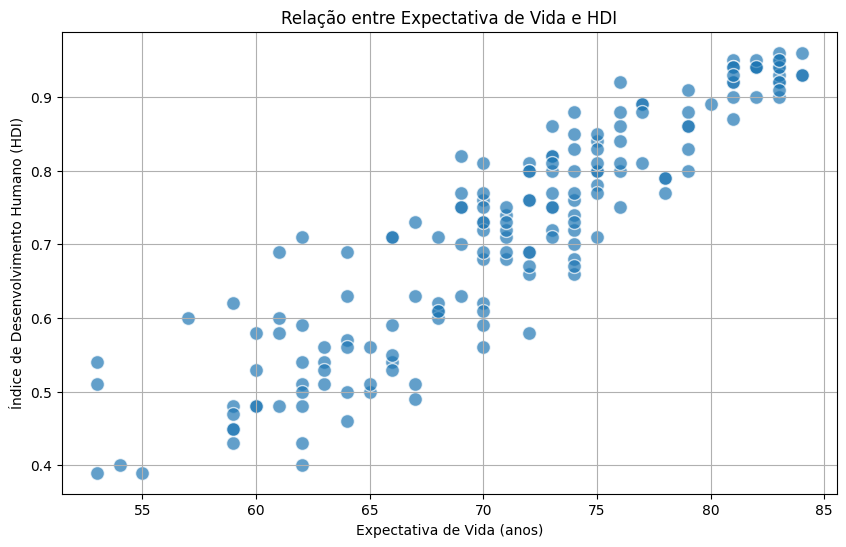

In [24]:
# Convertendo 'Life Expectancy' e 'HDI' para numérico
df['Life Exectancy'] = pd.to_numeric(df['Life Exectancy'], errors='coerce')
df['HDI'] = pd.to_numeric(df['HDI'], errors='coerce')

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Life Exectancy'], df['HDI'], alpha=0.7, edgecolors="w", s=100)
plt.title('Relação entre Expectativa de Vida e HDI')
plt.xlabel('Expectativa de Vida (anos)')
plt.ylabel('Índice de Desenvolvimento Humano (HDI)')
plt.grid(True)
plt.show()

#### 2. Como a pegada ecológica total de consumo se distribui entre diferentes regiões?

C:\Users\fafab\AppData\Local\Temp\ipykernel_71228\3946429612.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




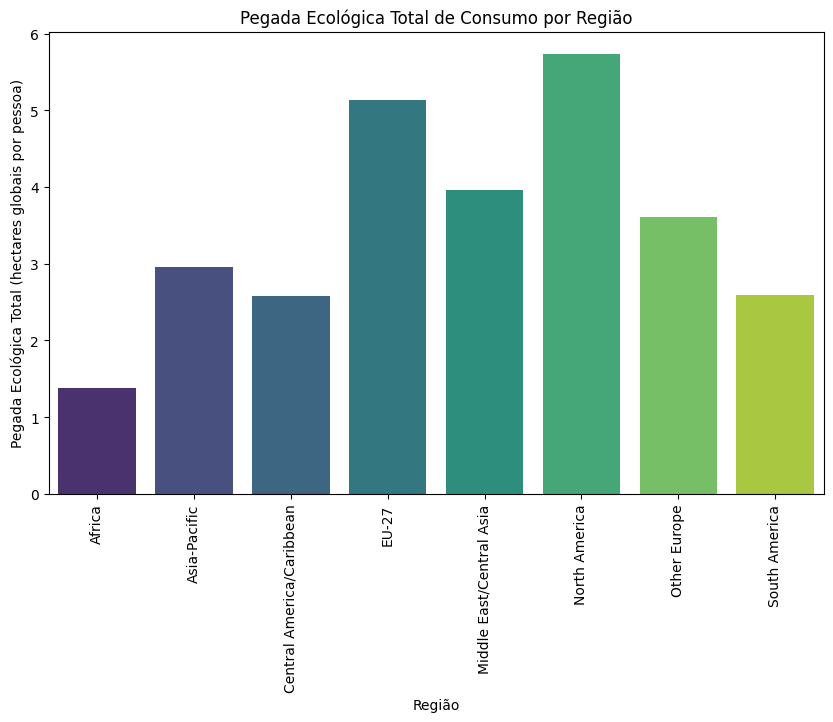

In [25]:
# Agrupar dados por região
region_footprint = df.groupby('Region')['Total Ecological Footprint (Consumption)'].mean().reset_index()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Ecological Footprint (Consumption)', data=region_footprint, palette='viridis')
plt.title('Pegada Ecológica Total de Consumo por Região')
plt.xlabel('Região')
plt.ylabel('Pegada Ecológica Total (hectares globais por pessoa)')
plt.xticks(rotation=90)
plt.show()

#### 3. Quais são os países com maior e menor PIB per capita?

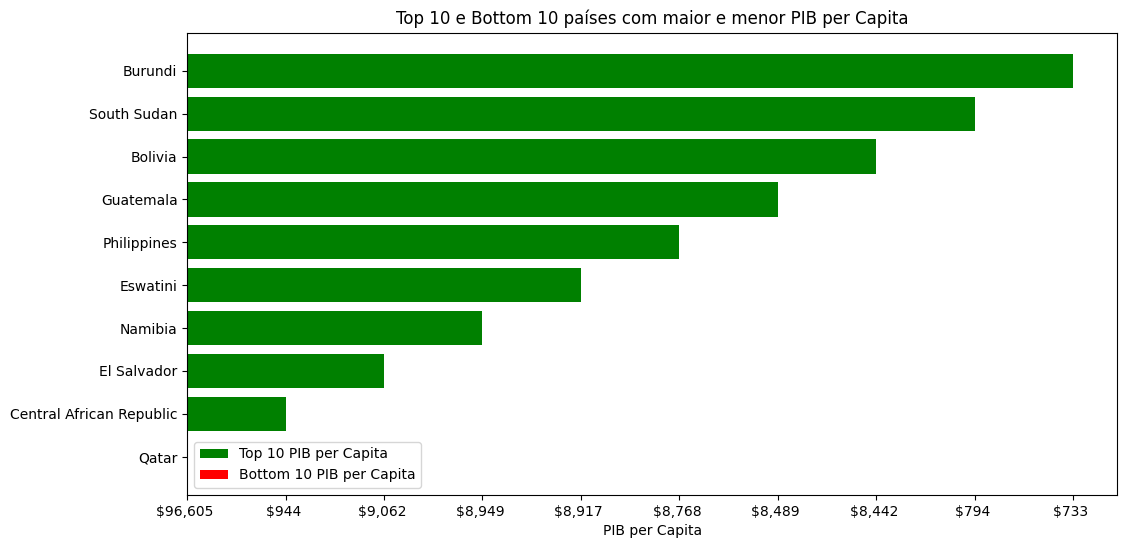

In [ ]:
# Ordenar os países por PIB per capita
df_sorted = df.sort_values('Per Capita GDP', ascending=False)

# Gráfico de barras dos 10 países com maior e menor PIB per capita
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10['Country'], top_10['Per Capita GDP'], color='green', label='Top 10 PIB per Capita')
plt.barh(bottom_10['Country'], bottom_10['Per Capita GDP'], color='red', label='Bottom 10 PIB per Capita')
plt.xlabel('PIB per Capita')
plt.title('Top 10 e Bottom 10 países com maior e menor PIB per Capita')
plt.legend()
plt.show()

#### 4. Qual a distribuição da pegada ecológica de carbono nos países?

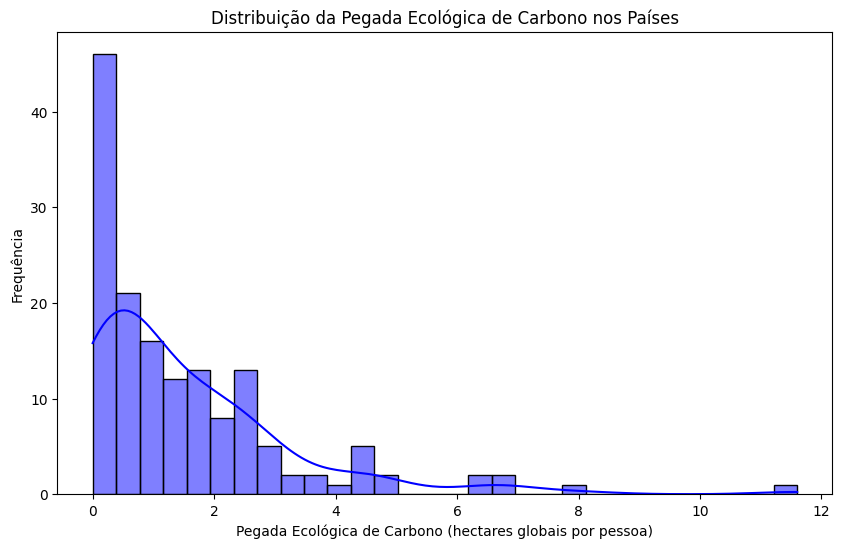

In [29]:
# Plotando a distribuição da pegada ecológica de carbono
plt.figure(figsize=(10, 6))
sns.histplot(df['Carbon Footprint'], kde=True, color='blue', bins=30)
plt.title('Distribuição da Pegada Ecológica de Carbono nos Países')
plt.xlabel('Pegada Ecológica de Carbono (hectares globais por pessoa)')
plt.ylabel('Frequência')
plt.show()

#### 5. Qual é a correlação entre a Pegada Ecológica de Cropland e o Índice de Desenvolvimento Humano?

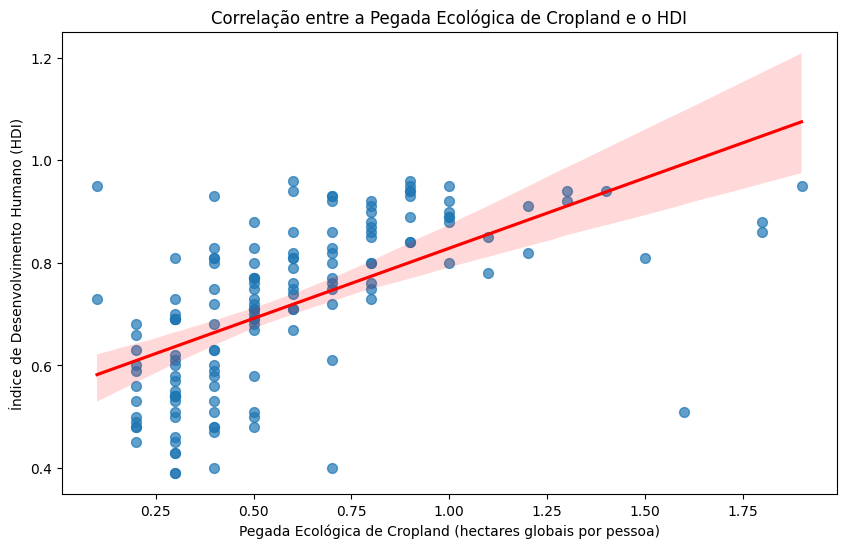

In [30]:
# Calculando a correlação
correlation = df[['Cropland Footprint', 'HDI']].corr()

# Criando o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='Cropland Footprint', y='HDI', data=df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={"color": "red"})
plt.title('Correlação entre a Pegada Ecológica de Cropland e o HDI')
plt.xlabel('Pegada Ecológica de Cropland (hectares globais por pessoa)')
plt.ylabel('Índice de Desenvolvimento Humano (HDI)')
plt.show()

#### 6. Como o PIB per capita está relacionado com a expectativa de vida?

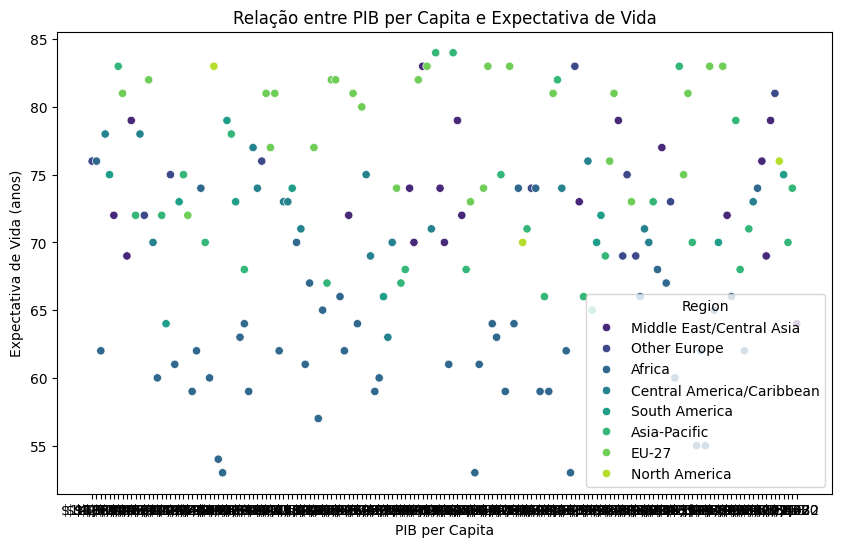

In [32]:
# Gráfico de dispersão entre PIB per capita e Expectativa de Vida
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Per Capita GDP', y='Life Exectancy', data=df, hue='Region', palette='viridis')
plt.title('Relação entre PIB per Capita e Expectativa de Vida')
plt.xlabel('PIB per Capita')
plt.ylabel('Expectativa de Vida (anos)')
plt.show()

#### 7. Como a pegada ecológica de produtos florestais se distribui por grupos de renda?

C:\Users\fafab\AppData\Local\Temp\ipykernel_71228\2024543861.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




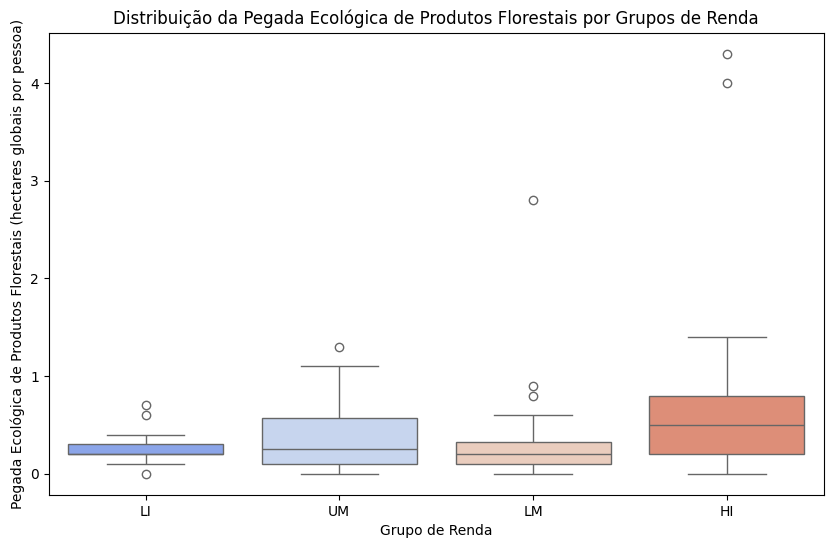

In [33]:
# Gráfico de boxplot para distribuir a pegada ecológica de produtos florestais por grupos de renda
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='Forest Product Footprint', data=df, palette='coolwarm')
plt.title('Distribuição da Pegada Ecológica de Produtos Florestais por Grupos de Renda')
plt.xlabel('Grupo de Renda')
plt.ylabel('Pegada Ecológica de Produtos Florestais (hectares globais por pessoa)')
plt.show()

#### 8. Qual é a relação entre o número de Terras necessárias e a Pegada Ecológica Total de Consumo?

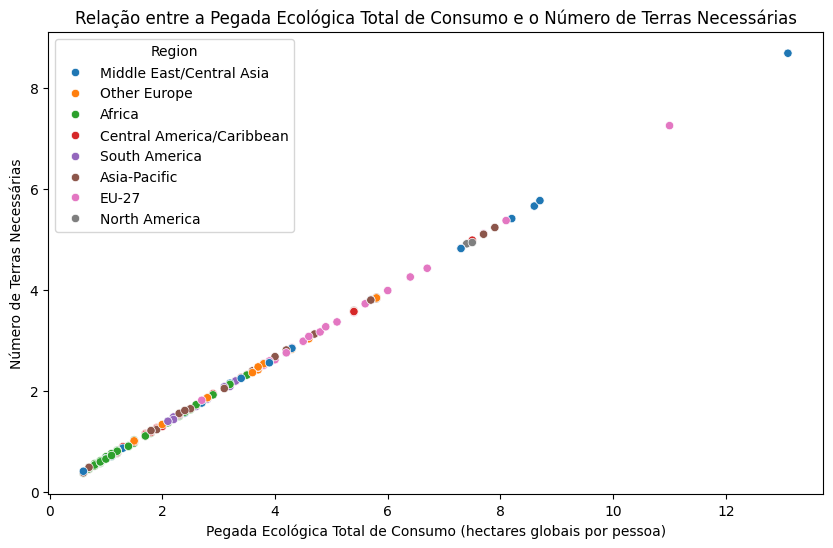

In [34]:
# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Ecological Footprint (Consumption)', y='Number of Earths required', data=df, hue='Region')
plt.title('Relação entre a Pegada Ecológica Total de Consumo e o Número de Terras Necessárias')
plt.xlabel('Pegada Ecológica Total de Consumo (hectares globais por pessoa)')
plt.ylabel('Número de Terras Necessárias')
plt.show()

#### 9. Como a Pegada Ecológica Total de Consumo varia com a Região?

C:\Users\fafab\AppData\Local\Temp\ipykernel_71228\2618000534.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




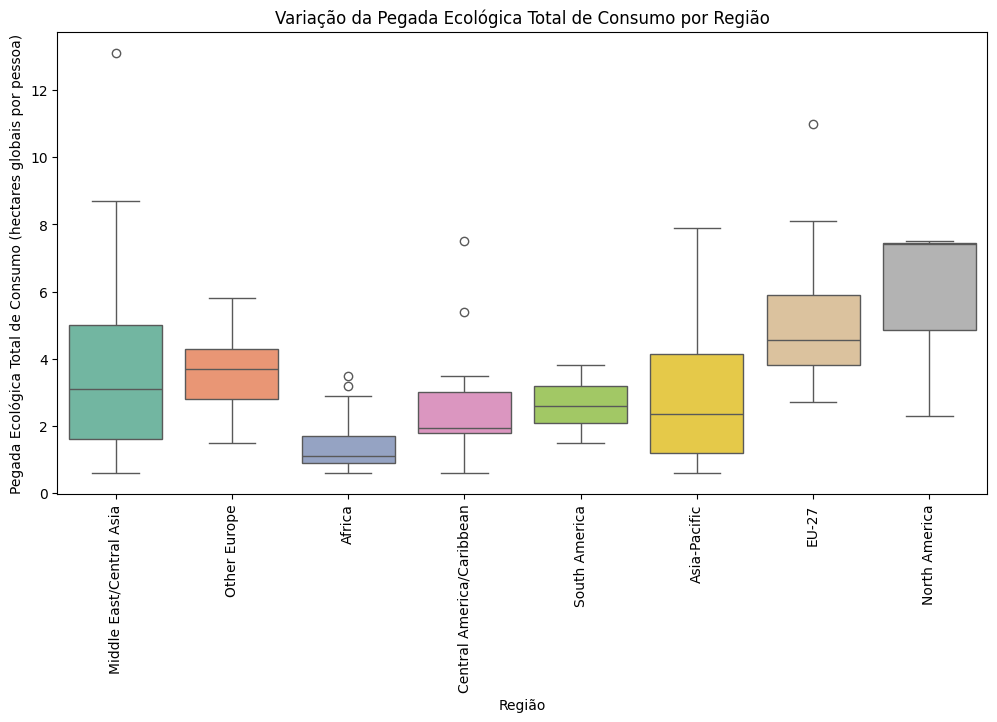

In [35]:
# Plotando o gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total Ecological Footprint (Consumption)', data=df, palette='Set2')
plt.title('Variação da Pegada Ecológica Total de Consumo por Região')
plt.xlabel('Região')
plt.ylabel('Pegada Ecológica Total de Consumo (hectares globais por pessoa)')
plt.xticks(rotation=90)
plt.show()

#### 10. Como a Pegada Ecológica Total de Consumo se relaciona com a Biocapacidade Total?

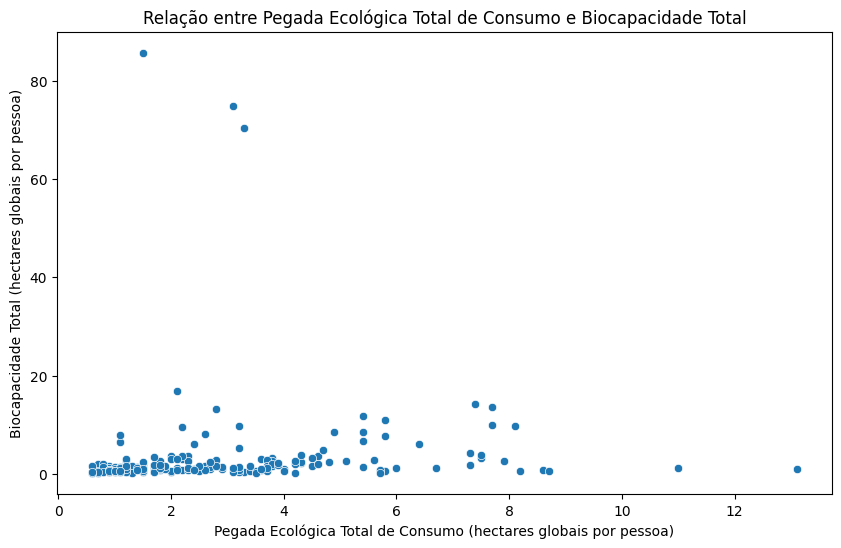

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Ecological Footprint (Consumption)', y='Total biocapacity ', data=df)
plt.title('Relação entre Pegada Ecológica Total de Consumo e Biocapacidade Total')
plt.xlabel('Pegada Ecológica Total de Consumo (hectares globais por pessoa)')
plt.ylabel('Biocapacidade Total (hectares globais por pessoa)')
plt.show()


#### Regressão: Regressão Linear

MSE da Regressão Linear: 0.9495082517695361
R² da Regressão Linear: 0.7612471998690228


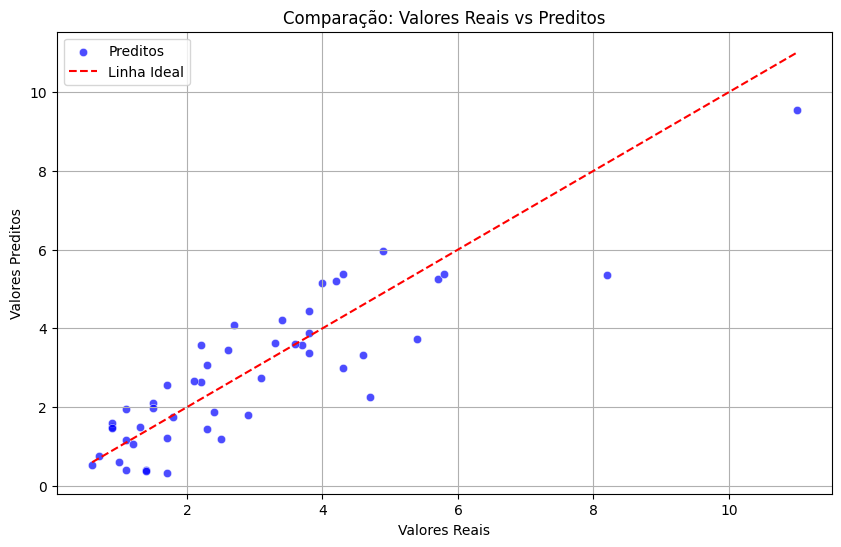

C:\Users\fafab\AppData\Local\Temp\ipykernel_71228\2364846199.py:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




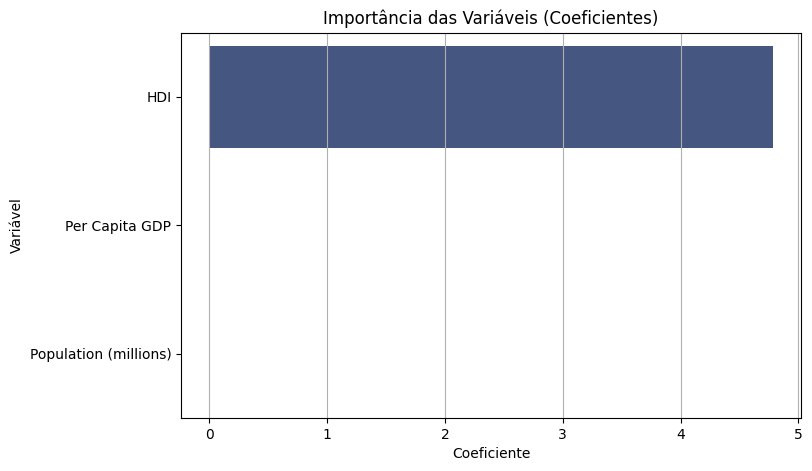

Previsões para Novos Dados:
[2.56678113 3.42905329]


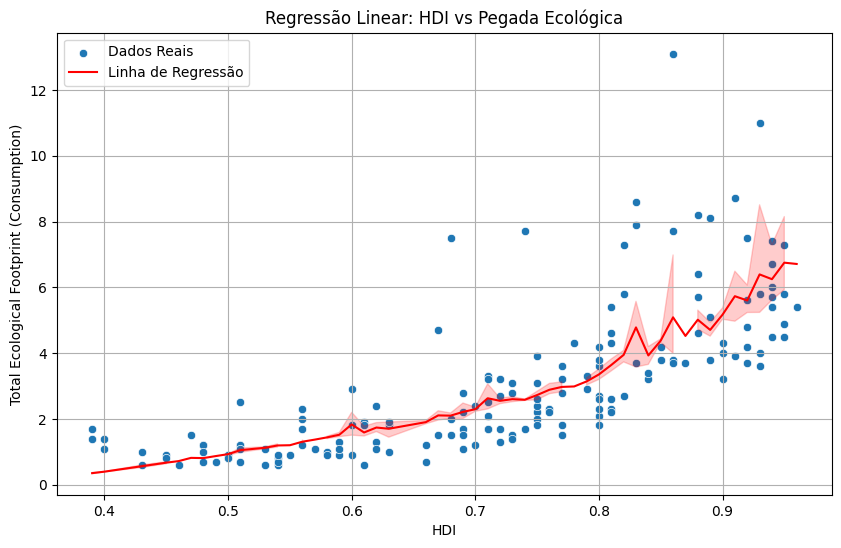

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supomos que df já foi carregado com os dados
# Limpeza inicial
df_cleaned = df.replace(r'^\s*$', np.nan, regex=True)  # Substituir espaços em branco por NaN
df_cleaned = df_cleaned[['HDI', 'Population (millions)', 'Per Capita GDP', 'Total Ecological Footprint (Consumption)']].dropna()

# Remover caracteres especiais e converter para float
for col in ['HDI', 'Population (millions)', 'Per Capita GDP']:
    df_cleaned[col] = (
        df_cleaned[col]
        .str.replace(r'[^\d.-]', '', regex=True)  # Remove tudo que não for número, ponto ou hífen
        .astype(float)  # Converte para float
    )

# A coluna de 'Total Ecological Footprint (Consumption)' já está em float, então não precisa de conversão.

# Separe as variáveis preditoras e o alvo
X = df_cleaned[['HDI', 'Population (millions)', 'Per Capita GDP']]
y = df_cleaned['Total Ecological Footprint (Consumption)']

# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE da Regressão Linear:", mse)
print("R² da Regressão Linear:", r2)

# Visualização: Valores Reais vs Preditos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Preditos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha Ideal')
plt.title('Comparação: Valores Reais vs Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.grid()
plt.show()

# Visualização: Importância das Variáveis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')
plt.title('Importância das Variáveis (Coeficientes)')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.grid(axis='x')
plt.show()

# Previsão com Novos Valores (Exemplo)
new_data = pd.DataFrame({
    'HDI': [0.75, 0.82],
    'Population (millions)': [1000, 500],
    'Per Capita GDP': [15000, 22000]
})

new_predictions = model.predict(new_data)
print("Previsões para Novos Dados:")
print(new_predictions)

# Visualização: Gráfico de Dispersão e Linha de Regressão para uma variável (exemplo com HDI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['HDI'], y=df_cleaned['Total Ecological Footprint (Consumption)'], label='Dados Reais')
sns.lineplot(x=df_cleaned['HDI'], y=model.predict(X), color='red', label='Linha de Regressão')
plt.title('Regressão Linear: HDI vs Pegada Ecológica')
plt.xlabel('HDI')
plt.ylabel('Total Ecological Footprint (Consumption)')
plt.legend()
plt.grid()
plt.show()


#### Classificação: Árvore de Decisão

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Preparar os dados
X = df[['HDI', 'Population (millions)', 'Per Capita GDP']].dropna()
y = df['Income Group'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Árvore de Decisão
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Avaliar o modelo
print("Acurácia da Árvore de Decisão:", accuracy_score(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [165, 178]